In [17]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

2022-10-30 04:03:49.808325: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-30 04:03:49.870094: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-30 04:03:49.884225: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-30 04:03:50.141841: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

In [18]:
type(train_images), train_images.shape, test_images.shape

(numpy.ndarray, (60000, 28, 28), (10000, 28, 28))

In [21]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

2022-10-30 04:04:09.343494: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-30 04:04:09.346265: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-30 04:04:09.346347: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-30 04:04:09.346994: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compi

In [22]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [23]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255 
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [6]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
 89/469 [====>.........................] - ETA: 0s - loss: 0.5066 - accuracy: 0.8550

2022-10-27 19:55:46.736829: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


469/469 [==============================] - 2s 3ms/step - loss: 0.2556 - accuracy: 0.9258
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1027 - accuracy: 0.9697
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0683 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0494 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0370 - accuracy: 0.9887


In [7]:
test_digits = test_images[:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 32ms/step


array([2.8833285e-09, 2.1335137e-11, 2.2006921e-06, 1.9093590e-05,
       1.3666803e-12, 4.7499618e-09, 1.4611293e-14, 9.9997854e-01,
       1.8490834e-08, 1.4197866e-07], dtype=float32)

In [9]:
predictions[0].argmax()

7

In [10]:
test_labels[0]

7

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.0630 - accuracy: 0.9826


In [12]:
test_loss, test_acc

(0.06298802047967911, 0.9825999736785889)

In [13]:
train_images.ndim

2

In [14]:
train_images.dtype

dtype('float32')

In [16]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

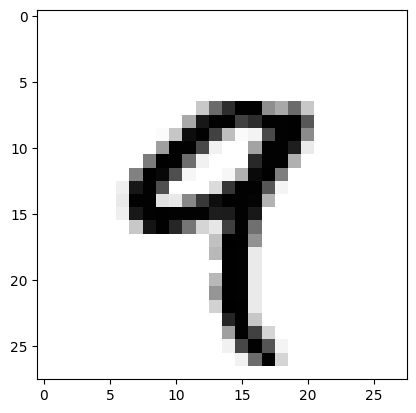

In [17]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [35]:
import numpy as np
x = np.zeros((64, 3, 32, 10))
y = np.ones((32, 10))
z = np.maximum(x, y)

In [36]:
z.shape

(64, 3, 32, 10)

In [42]:
y.sum()

320.0

In [43]:
z.sum()

61440.0

In [44]:
64*3*32*10


61440

In [41]:
(z[:,:] == y).sum()

61440

In [47]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)
z

7.077495668950695

In [58]:
c = np.random.randn(4, 5)
c.shape, len(c)

((4, 5), 4)

In [50]:
len(x.shape)

1

In [59]:
def naive_matrix_vector_dot(x, y):
    assert x.ndim == 2
    assert y.ndim == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j] 
    return z

naive_matrix_vector_dot(np.random.randn(3, 5), np.random.randn(5))

array([ 0.29210264, -0.88823514, -4.63943485])

In [60]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)
grad_of_y_wrt_x

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [61]:
tf.random.uniform((2,4))

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[0.78794503, 0.70237803, 0.95670867, 0.45256686],
       [0.6015717 , 0.4640242 , 0.5506128 , 0.05050397]], dtype=float32)>

In [63]:
a = [3,4,5,21,3]
a[3:100]

[21, 3]

In [65]:
x = tf.ones(2,2)

In [66]:
x[0,0] = 1

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [71]:
tf.ones((3,4,12)).shape

TensorShape([3, 4, 12])

In [75]:
v = tf.Variable(initial_value=tf.random.normal(shape=[3,4]))
# v = v.assign_add(tf.ones(shape=[3,4]))

In [76]:
v

<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
array([[ 0.97344875, -1.7134778 ,  0.11006825, -0.6784401 ],
       [-1.6194805 , -1.2053598 ,  1.6149752 , -1.2239372 ],
       [ 1.1877862 , -0.35222548,  0.0449614 , -1.3222901 ]],
      dtype=float32)>

In [77]:
z = v * 3
z

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[ 2.9203463 , -5.1404333 ,  0.33020473, -2.0353203 ],
       [-4.8584414 , -3.6160793 ,  4.844926  , -3.6718116 ],
       [ 3.5633588 , -1.0566764 ,  0.13488421, -3.9668703 ]],
      dtype=float32)>

In [78]:
with tf.GradientTape as tape:
    r = z + v
tape.gradient(r, v)

AttributeError: __enter__

In [83]:
x = tf.constant(3.0)
with tf.GradientTape() as g:
  g.watch(x)
  y = x * x
dy_dx = g.gradient(y, x)
print(dy_dx)

tf.Tensor(6.0, shape=(), dtype=float32)


In [84]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.12000429],
       [ 0.8660266 ],
       [-0.25451735]], dtype=float32)>

In [85]:
v.assign(tf.ones((3, 1)))
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [86]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[2.],
       [2.],
       [2.]], dtype=float32)>

In [87]:
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[2.],
       [2.],
       [2.]], dtype=float32)>

In [88]:
time = tf.Variable(0.) 
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2 
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

In [89]:
acceleration

<tf.Tensor: shape=(), dtype=float32, numpy=9.8>

In [90]:
num_samples_per_class = 1000 
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

In [91]:
positive_samples.shape

(1000, 2)

In [92]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [93]:
inputs.shape

(2000, 2)

In [94]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype=np.float32),
                    np.ones((num_samples_per_class, 1), dtype=np.float32)))

In [95]:
targets.shape

(2000, 1)

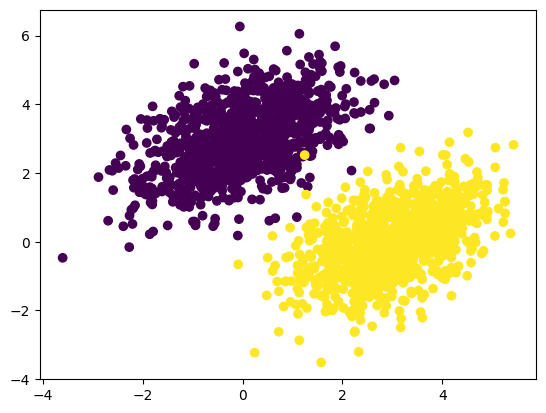

In [96]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [123]:
input_dim = 2
target_dim = 1
W = tf.Variable(tf.random.uniform((input_dim, target_dim)))
b = tf.Variable(tf.zeros((target_dim,)))

In [124]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [125]:
W.shape

TensorShape([2, 1])

In [126]:
def square_loss(targets, predictions):
    return tf.reduce_mean(tf.square(targets - predictions))

In [130]:
lr = 1e-1

def training_step(inputs, targets):
    with tf.GradientTape(persistent=True) as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    W.assign_sub(lr * tape.gradient(loss, W))
    b.assign_sub(lr * tape.gradient(loss, b))
    return loss

In [131]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.0890
Loss at step 1: 0.0820
Loss at step 2: 0.0770
Loss at step 3: 0.0726
Loss at step 4: 0.0686
Loss at step 5: 0.0649
Loss at step 6: 0.0615
Loss at step 7: 0.0585
Loss at step 8: 0.0556
Loss at step 9: 0.0530
Loss at step 10: 0.0507
Loss at step 11: 0.0485
Loss at step 12: 0.0465
Loss at step 13: 0.0447
Loss at step 14: 0.0431
Loss at step 15: 0.0416
Loss at step 16: 0.0402
Loss at step 17: 0.0389
Loss at step 18: 0.0378
Loss at step 19: 0.0367
Loss at step 20: 0.0357
Loss at step 21: 0.0348
Loss at step 22: 0.0340
Loss at step 23: 0.0333
Loss at step 24: 0.0326
Loss at step 25: 0.0320
Loss at step 26: 0.0314
Loss at step 27: 0.0309
Loss at step 28: 0.0304
Loss at step 29: 0.0300
Loss at step 30: 0.0296
Loss at step 31: 0.0292
Loss at step 32: 0.0289
Loss at step 33: 0.0286
Loss at step 34: 0.0283
Loss at step 35: 0.0280
Loss at step 36: 0.0278
Loss at step 37: 0.0276
Loss at step 38: 0.0274
Loss at step 39: 0.0272


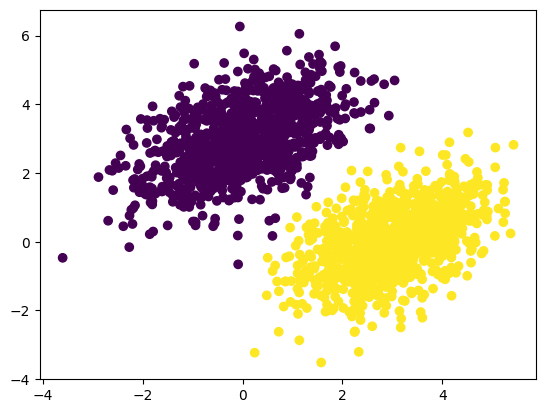

In [132]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

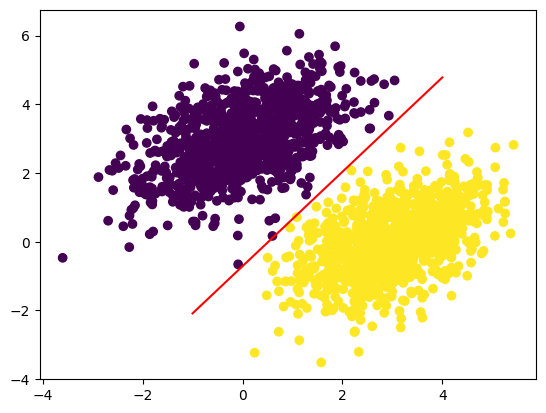

In [133]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

In [134]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):
    

    def __init__(self, units, activation=None) -> None:
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        self.W = self.add_weight(shape=(input_shape[-1], self.units), initializer='random_normal')
        self.b = self.add_weight(shape=(self.units,), initializer='zeros')

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [135]:
dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(10, 32))
output_tensor = dense(input_tensor)
print(output_tensor.shape)

(10, 32)


In [136]:
output_tensor

<tf.Tensor: shape=(10, 32), dtype=float32, numpy=
array([[0.05552435, 0.3109188 , 0.17796516, 0.13032103, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.25583076,
        0.        , 0.40569544, 0.        , 0.        , 0.        ,
        0.32629967, 0.        , 0.21909904, 0.11116028, 0.        ,
        0.        , 0.3207817 , 0.11965847, 0.3608265 , 0.08204746,
        0.0252893 , 0.20409107, 0.31261158, 0.        , 0.0433979 ,
        0.17175484, 0.        ],
       [0.05552435, 0.3109188 , 0.17796516, 0.13032103, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.25583076,
        0.        , 0.40569544, 0.        , 0.        , 0.        ,
        0.32629967, 0.        , 0.21909904, 0.11116028, 0.        ,
        0.        , 0.3207817 , 0.11965847, 0.3608265 , 0.08204746,
        0.0252893 , 0.20409107, 0.31261158, 0.        , 0.0433979 ,
        0.17175484, 0.        ],
       [0.05552435, 0.3109188 , 0.17796516, 0.13032103, 0.        ,


In [139]:
for vector in np.random.randn(2, 5)[:, 1:4]:
    print(vector)

[-2.22805817 -0.0380295  -0.13298612]
[ 0.18382092 -0.72549558  0.17260335]


In [140]:
def self_attention(input_sequence):
    output = np.zeros(shape=input_sequence.shape)
    for i, pivot_vector in enumerate(input_sequence):
        scores = np.zeros(shape=(len(input_sequence),))
        for j, vector in enumerate(input_sequence):
            scores[j] = np.dot(pivot_vector, vector)
        scores /= np.sqrt(input_sequence.shape[1])
        scores = tf.nn.softmax(scores)
        new_pivot_representation = np.zeros(shape=pivot_vector.shape)
        for j, vector in enumerate(input_sequence):
            new_pivot_representation += vector * scores[j]
        output[i] = new_pivot_representation
    return output

In [145]:
input_sequence = np.ones((20, 32))
output = self_attention(input_sequence)
output.shape

(20, 32)

In [155]:
from keras.layers import MultiHeadAttention
num_heads = 4 
embed_dim = 256
inputs = tf.random.normal((3, 256))
mha_layer = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
outputs = mha_layer(inputs, inputs)

IndexError: Exception encountered when calling layer "softmax_4" "                 f"(type Softmax).

tuple index out of range

Call arguments received by layer "softmax_4" "                 f"(type Softmax):
  • inputs=tf.Tensor(shape=(3, 4), dtype=float32)
  • mask=None

In [166]:
a

<tf.Tensor: shape=(7, 10), dtype=float32, numpy=
array([[8.8370323e-01, 1.1861789e-01, 2.3680222e-01, 3.5339487e-01,
        2.5050342e-01, 6.8147552e-01, 7.3934436e-02, 1.3651609e-02,
        2.5839603e-01, 7.2755337e-01],
       [9.7631955e-01, 7.0909607e-01, 8.1656528e-01, 6.3662386e-01,
        2.2146034e-01, 1.7799807e-01, 1.9326973e-01, 5.1833189e-01,
        7.4643898e-01, 4.4143391e-01],
       [4.1733325e-01, 1.3635170e-01, 6.0558307e-01, 9.9180663e-01,
        8.5639954e-04, 6.2902355e-01, 8.6326063e-01, 5.0078225e-01,
        9.3574762e-01, 9.4272339e-01],
       [6.3147187e-02, 6.9724083e-01, 1.9879162e-01, 5.9850121e-01,
        2.7765477e-01, 4.5673096e-01, 3.0764496e-01, 6.9591892e-01,
        6.7116559e-01, 4.4235671e-01],
       [3.3371782e-01, 6.2937546e-01, 2.4670863e-01, 7.0836401e-01,
        6.1701918e-01, 1.2200177e-01, 9.2037320e-01, 1.3115251e-01,
        9.9316096e-01, 9.5558226e-01],
       [5.9054267e-01, 6.6761291e-01, 6.6782498e-01, 8.6286402e-01,
        

In [170]:
a = tf.random.uniform((7, 10))
tf.argmax(tf.nn.softmax(tf.matmul(a, tf.transpose(a))), axis=1)

<tf.Tensor: shape=(7,), dtype=int64, numpy=array([5, 4, 2, 3, 3, 5, 2])>

In [168]:
a = tf.random.uniform((3, 5))
a

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[0.70333827, 0.27808487, 0.42507005, 0.23994946, 0.4126295 ],
       [0.9801874 , 0.07290494, 0.636966  , 0.97542393, 0.30518734],
       [0.9693507 , 0.16148674, 0.3596363 , 0.70331407, 0.93597007]],
      dtype=float32)>

In [171]:
from keras.datasets import imdb

(x_train, y_train), (x_test, y_test) = imdb.load_data()

17464789/17464789 [==============================] - 6s 0us/step


In [172]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1

In [175]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

/usr/bin/zsh: /home/rayed/anaconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /usr/bin/zsh)
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  2949k      0  0:00:27  0:00:27 --:--:-- 3679k 0  2791k      0  0:00:29  0:00:22  0:00:07 3229k
/usr/bin/zsh: /home/rayed/anaconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /usr/bin/zsh)


In [176]:
!cat aclImdb/train/pos/4077_10.txt

/usr/bin/zsh: /home/rayed/anaconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /usr/bin/zsh)
I first saw this back in the early 90s on UK TV, i did like it then but i missed the chance to tape it, many years passed but the film always stuck with me and i lost hope of seeing it TV again, the main thing that stuck with me was the end, the hole castle part really touched me, its easy to watch, has a great story, great music, the list goes on and on, its OK me saying how good it is but everyone will take there own best bits away with them once they have seen it, yes the animation is top notch and beautiful to watch, it does show its age in a very few parts but that has now become part of it beauty, i am so glad it has came out on DVD as it is one of my top 10 films of all time. Buy it or rent it just see it, best viewing is at night alone with drink and food in reach so you don't have to stop the film.<br /><br />Enjoy

In [178]:
import os, pathlib, shutil, random

base_dir = pathlib.Path('aclImdb')
val_dir = base_dir / 'val'
train_dir = base_dir / 'train'
for category in ['neg', 'pos']:
    os.makedirs(val_dir / category, exist_ok=True)
    files = os.listdir(train_dir / category)
    random.Random(1337).shuffle(files)
    num_val_samples = int(0.2 * len(files))
    val_files = files[-num_val_samples:]
    for fname in val_files:
        shutil.move(train_dir / category / fname,
                    val_dir / category / fname)


In [179]:
len(os.listdir('aclImdb/train/pos/'))

10000

In [180]:
len(os.listdir('aclImdb/val/pos/'))

2500

In [1]:
from tensorflow import keras

batch_size = 32

train_ds = keras.utils.text_dataset_from_directory('aclImdb/train', batch_size=batch_size)
val_ds = keras.utils.text_dataset_from_directory('aclImdb/val', batch_size=batch_size)
test_ds = keras.utils.text_dataset_from_directory('aclImdb/test', batch_size=batch_size)

2022-10-30 04:43:57.888040: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-30 04:43:57.952122: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-30 04:43:57.968517: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-30 04:43:58.270614: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

Found 20000 files belonging to 2 classes.


2022-10-30 04:43:58.834800: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-30 04:43:58.839760: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-30 04:43:58.839870: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-30 04:43:58.840403: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compi

Found 5000 files belonging to 2 classes.
Found 25000 files belonging to 2 classes.


In [2]:
from keras.layers import TextVectorization
text_vectorization = TextVectorization(max_tokens=20_000, output_mode='multi_hot')

text_only_train_ds = train_ds.map(lambda x, y: x)
text_vectorization.adapt(text_only_train_ds)

binary_1gram_train_ds = train_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
binary_1gram_val_ds = val_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
binary_1gram_test_ds = test_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)

In [185]:
for inputs, targets in binary_1gram_train_ds.take(1):
    print("inputs.shape:", inputs.shape)
    print("inputs.dtype:", inputs.dtype)
    print("targets.shape:", targets.shape)
    print("targets.dtype:", targets.dtype)
    print("inputs[0]:", inputs[0])
    print("targets[0]:", targets[0])

inputs.shape: (32, 20000)
inputs.dtype: <dtype: 'float32'>
targets.shape: (32,)
targets.dtype: <dtype: 'int32'>
inputs[0]: tf.Tensor([1. 1. 1. ... 0. 0. 0.], shape=(20000,), dtype=float32)
targets[0]: tf.Tensor(0, shape=(), dtype=int32)


In [186]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model(max_tokens=20_000, hidden_dim=16):
    inputs = layers.Input(shape=(max_tokens,))
    x = layers.Dense(hidden_dim, activation='relu')(inputs)
    dropout = layers.Dropout(0.5)(x)
    outputs = layers.Dense(1, activation='sigmoid')(dropout)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer='rmsprop',
                    loss="binary_crossentropy",
                    metrics=['accuracy'])
    return model

In [189]:
model = get_model()
model.summary()
callbacks = [
    keras.callbacks.ModelCheckpoint('binary_1gram.keras', save_best_only=True)
]
model.fit(
    binary_1gram_train_ds.cache(),
    validation_data=binary_1gram_val_ds.cache(),
    epochs=10,
    callbacks=callbacks
)
model = keras.models.load_model("binary_1gram.keras")
print(f"Test acc: {model.evaluate(binary_1gram_test_ds)[1]:.3f}")

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 20000)]           0         
                                                                 
 dense_6 (Dense)             (None, 16)                320016    
                                                                 
 dropout_7 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 320,033
Trainable params: 320,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4132 - accuracy: 0.8231 - val_loss: 0.2906 - val_accuracy: 0.8854
Epoch 2/10
625/625 [=======================

In [190]:
text_vectorization = TextVectorization(
    ngrams=2,
    max_tokens=20000,
    output_mode="multi_hot",
)

In [191]:
text_vectorization.adapt(text_only_train_ds)
binary_2gram_train_ds = train_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
binary_2gram_val_ds = val_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
binary_2gram_test_ds = test_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
 
model = get_model()
model.summary()
callbacks = [
    keras.callbacks.ModelCheckpoint("binary_2gram.keras",
                                    save_best_only=True)
]
model.fit(binary_2gram_train_ds.cache(),
          validation_data=binary_2gram_val_ds.cache(),
          epochs=10,
          callbacks=callbacks)
model = keras.models.load_model("binary_2gram.keras")
print(f"Test acc: {model.evaluate(binary_2gram_test_ds)[1]:.3f}")

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 20000)]           0         
                                                                 
 dense_8 (Dense)             (None, 16)                320016    
                                                                 
 dropout_8 (Dropout)         (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 320,033
Trainable params: 320,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3792 - accuracy: 0.8435 - val_loss: 0.2736 - val_accuracy: 0.8908
Epoch 2/10
625/625 [=======================

In [193]:
for input, target in binary_2gram_train_ds.take(1):
    print(input)

tf.Tensor(
[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]], shape=(32, 20000), dtype=float32)


In [198]:
text_vectorization.get_vocabulary()

['[UNK]',
 'the',
 'and',
 'a',
 'of',
 'to',
 'is',
 'in',
 'it',
 'i',
 'this',
 'that',
 'br',
 'was',
 'as',
 'for',
 'with',
 'movie',
 'but',
 'of the',
 'film',
 'on',
 'not',
 'you',
 'are',
 'his',
 'have',
 'be',
 'he',
 'one',
 'its',
 'in the',
 'at',
 'all',
 'by',
 'an',
 'they',
 'from',
 'who',
 'so',
 'like',
 'her',
 'just',
 'or',
 'about',
 'has',
 'if',
 'out',
 'some',
 'there',
 'what',
 'this movie',
 'good',
 'when',
 'more',
 'very',
 'and the',
 'is a',
 'even',
 'my',
 'she',
 'no',
 'the film',
 'would',
 'up',
 'to be',
 'to the',
 'time',
 'which',
 'only',
 'really',
 'story',
 'see',
 'were',
 'their',
 'had',
 'the movie',
 'can',
 'this film',
 'me',
 'it is',
 'we',
 'than',
 'much',
 'well',
 'this is',
 'get',
 'will',
 'been',
 'into',
 'also',
 'because',
 'people',
 'do',
 'other',
 'on the',
 'bad',
 'first',
 'how',
 'in a',
 'great',
 'most',
 'dont',
 'him',
 'it was',
 'one of',
 'made',
 'for the',
 'then',
 'with the',
 'of a',
 'make',
 

In [199]:
text_vectorization = TextVectorization(
    ngrams=2,
    max_tokens=20000,
    output_mode="tf_idf",
)

In [200]:
text_vectorization.adapt(text_only_train_ds)
 
tfidf_2gram_train_ds = train_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
tfidf_2gram_val_ds = val_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
tfidf_2gram_test_ds = test_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
 
model = get_model()
model.summary()
callbacks = [
    keras.callbacks.ModelCheckpoint("tfidf_2gram.keras",
                                    save_best_only=True)
]
model.fit(tfidf_2gram_train_ds.cache(),
          validation_data=tfidf_2gram_val_ds.cache(),
          epochs=10,
          callbacks=callbacks)
model = keras.models.load_model("tfidf_2gram.keras")
print(f"Test acc: {model.evaluate(tfidf_2gram_test_ds)[1]:.3f}")

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 20000)]           0         
                                                                 
 dense_10 (Dense)            (None, 16)                320016    
                                                                 
 dropout_9 (Dropout)         (None, 16)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 320,033
Trainable params: 320,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 2s 3ms/step - loss: 0.5174 - accuracy: 0.7587 - val_loss: 0.3340 - val_accuracy: 0.8768
Epoch 2/10
625/625 [=======================

In [201]:
inputs = keras.Input(shape=(1,), dtype="string")
processed_inputs = text_vectorization(inputs)
outputs = model(processed_inputs)
inference_model = keras.Model(inputs, outputs)

In [204]:
import tensorflow as tf
raw_text_data = tf.convert_to_tensor([
    ["That was an excellent movie, I loved it."],
    ["That movie really sucked!"]
])
predictions = inference_model(raw_text_data) 
print(f"{float(predictions[1] * 100):.2f} percent positive")

39.87 percent positive


In [3]:
from tensorflow.keras import layers
  
max_length = 600 
max_tokens = 20000 
text_vectorization = layers.TextVectorization(
    max_tokens=max_tokens,
    output_mode="int",
    output_sequence_length=max_length,
)
text_vectorization.adapt(text_only_train_ds)
 
int_train_ds = train_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
int_val_ds = val_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
int_test_ds = test_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)

In [206]:
import tensorflow as tf
inputs = keras.Input(shape=(None,), dtype="int64")
embedded = tf.one_hot(inputs, depth=max_tokens)
x = layers.Bidirectional(layers.LSTM(32))(embedded)
x = layers.Dropout(0.5)(x) 
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, None)]            0         
                                                                 
 tf.one_hot (TFOpLambda)     (None, None, 20000)       0         
                                                                 
 bidirectional (Bidirectiona  (None, 64)               5128448   
 l)                                                              
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,128,513
Trainable params: 5,128,513
Non-trainable params: 0
_________________________________________________

In [207]:
callbacks = [
    keras.callbacks.ModelCheckpoint("one_hot_bidir_lstm.keras",
                                    save_best_only=True)
]
model.fit(int_train_ds, validation_data=int_val_ds, epochs=10,
          callbacks=callbacks)
model = keras.models.load_model("one_hot_bidir_lstm.keras") 
print(f"Test acc: {model.evaluate(int_test_ds)[1]:.3f}")

Epoch 1/10
  1/625 [..............................] - ETA: 15:30 - loss: 0.6916 - accuracy: 0.6562

2022-10-29 04:48:47.506752: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


625/625 [==============================] - 48s 74ms/step - loss: 0.5194 - accuracy: 0.7600 - val_loss: 0.3608 - val_accuracy: 0.8602
Epoch 2/10
625/625 [==============================] - 46s 74ms/step - loss: 0.3526 - accuracy: 0.8720 - val_loss: 0.3522 - val_accuracy: 0.8644
Epoch 3/10
625/625 [==============================] - 47s 75ms/step - loss: 0.2711 - accuracy: 0.9040 - val_loss: 0.9172 - val_accuracy: 0.8024
Epoch 4/10
625/625 [==============================] - 47s 75ms/step - loss: 0.2356 - accuracy: 0.9207 - val_loss: 0.2953 - val_accuracy: 0.8804
Epoch 5/10
625/625 [==============================] - 46s 74ms/step - loss: 0.2102 - accuracy: 0.9297 - val_loss: 0.3033 - val_accuracy: 0.8772
Epoch 6/10
625/625 [==============================] - 46s 74ms/step - loss: 0.1790 - accuracy: 0.9412 - val_loss: 0.3506 - val_accuracy: 0.8804
Epoch 7/10
625/625 [==============================] - 46s 74ms/step - loss: 0.1526 - accuracy: 0.9503 - val_loss: 0.3124 - val_accuracy: 0.8866
Epo

In [208]:
inputs = keras.Input(shape=(None,), dtype="int64")
embedded = layers.Embedding(input_dim=max_tokens, output_dim=256)(inputs)
x = layers.Bidirectional(layers.LSTM(32))(embedded)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()
  
callbacks = [
    keras.callbacks.ModelCheckpoint("embeddings_bidir_gru.keras",
                                    save_best_only=True)
]
model.fit(int_train_ds, validation_data=int_val_ds, epochs=10,
          callbacks=callbacks)
model = keras.models.load_model("embeddings_bidir_gru.keras") 
print(f"Test acc: {model.evaluate(int_test_ds)[1]:.3f}")

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 256)         5120000   
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               73984     
 nal)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,194,049
Trainable params: 5,194,049
Non-trainable params: 0
_________________________________________________

In [209]:
inputs = keras.Input(shape=(None,), dtype="int64")
embedded = layers.Embedding(
    input_dim=max_tokens, output_dim=256, mask_zero=True)(inputs)
x = layers.Bidirectional(layers.LSTM(32))(embedded)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()
callbacks = [
    keras.callbacks.ModelCheckpoint("embeddings_bidir_gru_with_masking.keras",
                                    save_best_only=True)
]
model.fit(int_train_ds, validation_data=int_val_ds, epochs=10,
          callbacks=callbacks)
model = keras.models.load_model("embeddings_bidir_gru_with_masking.keras") 
print(f"Test acc: {model.evaluate(int_test_ds)[1]:.3f}")

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_1 (Embedding)     (None, None, 256)         5120000   
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               73984     
 nal)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,194,049
Trainable params: 5,194,049
Non-trainable params: 0
_________________________________________________

2022-10-30 03:42:16.524477: W tensorflow/core/common_runtime/forward_type_inference.cc:332] Type inference failed. This indicates an invalid graph that escaped type checking. Error message: INVALID_ARGUMENT: expected compatible input types, but input 1:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_INT32
    }
  }
}
 is neither a subtype nor a supertype of the combined inputs preceding it:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_FLOAT
    }
  }
}

	while inferring type of node 'cond_40/output/_23'


625/625 [==============================] - 37s 55ms/step - loss: 0.4010 - accuracy: 0.8181 - val_loss: 0.2786 - val_accuracy: 0.8830
Epoch 2/10
625/625 [==============================] - 33s 54ms/step - loss: 0.2350 - accuracy: 0.9104 - val_loss: 0.2870 - val_accuracy: 0.8860
Epoch 3/10
625/625 [==============================] - 34s 55ms/step - loss: 0.1700 - accuracy: 0.9381 - val_loss: 0.2866 - val_accuracy: 0.8920
Epoch 4/10
625/625 [==============================] - 33s 53ms/step - loss: 0.1274 - accuracy: 0.9549 - val_loss: 0.3190 - val_accuracy: 0.8760
Epoch 5/10
625/625 [==============================] - 35s 55ms/step - loss: 0.0995 - accuracy: 0.9668 - val_loss: 0.3940 - val_accuracy: 0.8764
Epoch 6/10
625/625 [==============================] - 35s 56ms/step - loss: 0.0759 - accuracy: 0.9742 - val_loss: 0.3766 - val_accuracy: 0.8910
Epoch 7/10
625/625 [==============================] - 34s 55ms/step - loss: 0.0556 - accuracy: 0.9817 - val_loss: 0.4175 - val_accuracy: 0.8808
Epo

In [6]:
import numpy as np
path_to_glove_file = "glove.6B.100d.txt" 
  
embeddings_index = {} 
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs
  
print(f"Found {len(embeddings_index)} word vectors.")

Found 400000 word vectors.


In [7]:
embeddings_index['east']

array([-2.7382e-01, -2.8050e-01,  1.0621e+00,  2.8245e-01,  3.1069e-01,
       -3.3026e-01,  2.7613e-02,  3.5891e-01, -4.3318e-02,  2.6344e-01,
       -1.3780e-01,  1.4300e-01,  6.9496e-01,  4.8996e-01,  1.5001e-03,
       -4.1903e-01, -1.1194e-01, -9.1214e-01, -7.9896e-01, -3.4791e-01,
        6.0311e-01,  8.1101e-01,  8.7302e-01, -2.4191e-01,  1.8891e-01,
       -5.2116e-02,  2.4466e-01,  8.7903e-02,  2.5312e-01,  1.0033e-01,
       -5.0650e-01,  4.8329e-01,  2.9290e-02,  3.1287e-01, -2.3351e-02,
       -2.2463e-01,  2.8255e-01, -8.6472e-02,  9.1342e-02,  3.3247e-01,
       -8.7454e-01, -8.1585e-01, -1.8947e-02, -5.1873e-01,  6.8525e-01,
        1.8370e-01,  1.0631e+00, -2.2301e-01, -1.8461e-02,  4.0175e-01,
       -3.4234e-01,  2.3310e-01,  6.4983e-02,  2.8685e-01, -3.9582e-01,
       -2.6820e+00, -5.7566e-01, -9.1176e-01,  1.4487e+00, -8.9672e-02,
       -7.4737e-01,  7.5713e-01, -8.8766e-02, -5.6684e-01,  6.7291e-01,
        1.7928e-01,  2.1347e-01,  4.5381e-01,  3.5673e-01, -1.78

In [8]:
embedding_dim = 100

vocabulary = text_vectorization.get_vocabulary()
word_index = dict(zip(vocabulary, range(len(vocabulary))))

embedding_matrix = np.zeros((max_tokens, embedding_dim))
for word, i in word_index.items():
    if i < max_tokens:
        embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [9]:
embedding_layer = keras.layers.Embedding(
    max_tokens, 
    embedding_dim, 
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
    mask_zero=True)

In [12]:
inputs = keras.Input(shape=(None,), dtype="int64")
embedded = embedding_layer(inputs)
x = layers.Bidirectional(layers.LSTM(32))(embedded)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()
  
callbacks = [
    keras.callbacks.ModelCheckpoint("glove_embeddings_sequence_model.keras",
                                    save_best_only=True)
]
model.fit(int_train_ds, validation_data=int_val_ds, epochs=10,
          callbacks=callbacks)
model = keras.models.load_model("glove_embeddings_sequence_model.keras")
print(f"Test acc: {model.evaluate(int_test_ds)[1]:.3f}")

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 100)         2000000   
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               34048     
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,034,113
Trainable params: 34,113
Non-trainable params: 2,000,000
____________________________________________

2022-10-30 06:03:29.369924: E tensorflow/stream_executor/cuda/cuda_dnn.cc:389] Could not create cudnn handle: CUDNN_STATUS_INTERNAL_ERROR
2022-10-30 06:03:29.369958: W tensorflow/core/framework/op_kernel.cc:1780] OP_REQUIRES failed at cudnn_rnn_ops.cc:1554 : UNKNOWN: Fail to find the dnn implementation.


UnknownError: Graph execution error:

Detected at node 'cond/CudnnRNNV3' defined at (most recent call last):
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/traitlets/config/application.py", line 982, in launch_instance
      app.start()
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2885, in run_cell
      result = self._run_cell(
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3139, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3318, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_755020/3020009550.py", line 16, in <module>
      model.fit(int_train_ds, validation_data=int_val_ds, epochs=10,
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/keras/layers/rnn/bidirectional.py", line 277, in __call__
      return super().__call__(inputs, **kwargs)
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/keras/layers/rnn/bidirectional.py", line 404, in call
      y = self.forward_layer(
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/keras/layers/rnn/base_rnn.py", line 553, in __call__
      return super().__call__(inputs, **kwargs)
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/keras/layers/rnn/lstm.py", line 751, in call
      ) = lstm_with_backend_selection(**normal_lstm_kwargs)
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/keras/layers/rnn/lstm.py", line 1356, in lstm_with_backend_selection
      gru_lstm_utils.function_register(defun_gpu_lstm, **params)
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/keras/layers/rnn/gru_lstm_utils.py", line 257, in function_register
      concrete_func = func.get_concrete_function(*args, **kwargs)
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/keras/layers/rnn/lstm.py", line 1305, in gpu_lstm_with_fallback
      return tf.cond(
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/keras/layers/rnn/lstm.py", line 1275, in cudnn_lstm_fn
      return gpu_lstm(
    File "/home/rayed/anaconda3/envs/tf/lib/python3.9/site-packages/keras/layers/rnn/lstm.py", line 1115, in gpu_lstm
      outputs, h, c, _, _ = tf.raw_ops.CudnnRNNV3(
Node: 'cond/CudnnRNNV3'
Fail to find the dnn implementation.
	 [[{{node cond/CudnnRNNV3}}]]
	 [[model_2/bidirectional_2/forward_lstm_2/PartitionedCall]] [Op:__inference_train_function_45346]